In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# comment the magic command below if not running in Jupyter notebook
%matplotlib inline

In [2]:
data = pd.read_csv('data\spam.csv', encoding='latin-1')
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


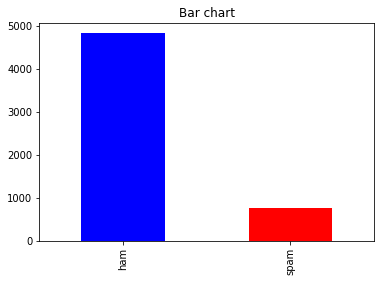

In [3]:
#Vamos a visualizar la distribución de legitimos y spam mensajes mediante un bar chart.
count_class = pd.value_counts(data['v1'], sort= True)
count_class.plot(kind='bar', color=['blue','red'])
plt.title('Bar chart')
plt.show()

In [4]:
#Las palabras no pueden alimentar el modelo como características, por lo que tenemos que vectorizarlas para crear nuevas.
#Hacemos esto considerando la frecuencia de palabras después de remover las sentencias comunes en ingles como "the", "a", "of", etc.
#Podemos hacer esta extracción de características fácilmente usando Scikit-Learn.
from sklearn.feature_extraction.text import CountVectorizer

f = CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
print(np.shape(X))
#Después de la vectorización 8404 nuevas características son creadas.

(5572, 8404)


In [5]:
#Ahora mapeas nuestras variables target en categorías y dividimos el dataset en train y test sets.
from sklearn.model_selection import train_test_split

data["v1"]=data["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = train_test_split(X, data['v1'], test_size=0.25, random_state=42) #Obligamos que el generador numeros random sea 42

In [6]:
#Inicializamos el modelo Naive Bayes y entrenamos los datos.
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [7]:
#Finalmente calibramos el rendimiento del modelo en el test set.
score = clf.score(X_test, y_test)
print('Accuracy: {}'.format(score))
#El modelo predijo la correcta clase para el 97,6% de muestras.

Accuracy: 0.9763101220387652
